In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.io import wavfile
import os
from guitare_configs import *
import mymodule as mm

%matplotlib widget

# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')
plt.rcParams["figure.figsize"] = (12,4)

# Expérience sur guitare+corde

In [16]:
path_to_folder = "../../../Mesures/Mesures_2023.01.20_Test/"


guit_exp_pos1 = {
    "x_acc" : 26e-2, #position selon x de l'accéléromètre (m)
    "y_acc" : 10e-2, #position selon y de l'accéléromètre (m)
    "xc_doigt" : 10.4e-2, #position du doigt sur la corde dans le cas où on appuie. On considère l'appuie sur la frette. (m)
}

guit_exp_pos2 = {
    "x_acc" : 8e-2, #position selon x de l'accéléromètre (m)
    "y_acc" : 8e-2, #position selon y de l'accéléromètre (m)
}

guit_exp = {
    "corde_config" : corde_acier,
    "table_config" : table_composite,
    "fs" : 0, #fréquence d'échantillonnage (Hz)
    "Pos 1" : guit_exp_pos1,
    "Pos 2" : guit_exp_pos2,
    "sensi_accel" : 99.3*9.81, #mV/(m/s2)
}

In [17]:
mat = loadmat(path_to_folder+"Guitare_Da_Prova_Pos_1.mat")
print(mat.keys())

fs = mat["fs"].reshape(-1)
guit_exp["fs"] = fs

guit_exp_pos1["acc_t"] = mat["acc_t"].reshape(-1)
guit_exp_pos1["time"] = mat["time"].reshape(-1)

mat = loadmat(path_to_folder+"Guitare_Da_Prova_Pos_1_Doigt.mat")
guit_exp_pos1["acc_doigt_t"] = mat["acc_t"].reshape(-1)

mat = loadmat(path_to_folder+"Guitare_Da_Prova_Pos_2.mat")
guit_exp_pos2["acc_t"] = mat["acc_t"].reshape(-1)
guit_exp_pos2["time"] = mat["time"].reshape(-1)

dict_keys(['__header__', '__version__', '__globals__', 'FRF', 'acc_t', 'fen_acc', 'fen_mar', 'freq', 'fs', 'mar_t', 'signal_accelero_fen', 'signal_marteau_fen', 'time'])


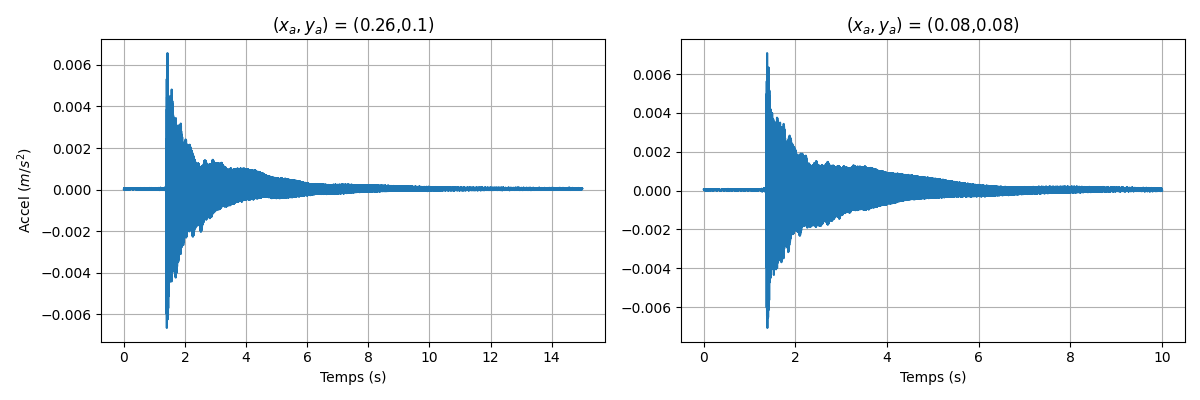

In [19]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(guit_exp_pos1["time"],guit_exp_pos1["acc_t"]/guit_exp["sensi_accel"],label="")
ax1.grid()
ax1.set_title(fr"$(x_a,y_a)$ = ({guit_exp_pos1['x_acc']},{guit_exp_pos1['y_acc']})")
ax1.set_ylabel("Accel $(m/s^2)$")
ax1.set_xlabel("Temps (s)")
# ax1.legend()
ax1.set_xlim()
ax1.set_ylim()

ax2.plot(guit_exp_pos2["time"],guit_exp_pos2["acc_t"]/guit_exp["sensi_accel"],label="")
ax2.grid()
ax2.set_xlabel("Temps (s)")
ax2.set_title(fr"$(x_a,y_a)$ = ({guit_exp_pos2['x_acc']},{guit_exp_pos2['y_acc']})")
# ax2.legend()
ax2.set_xlim()
ax2.set_ylim()

fig.tight_layout()

plt.show()

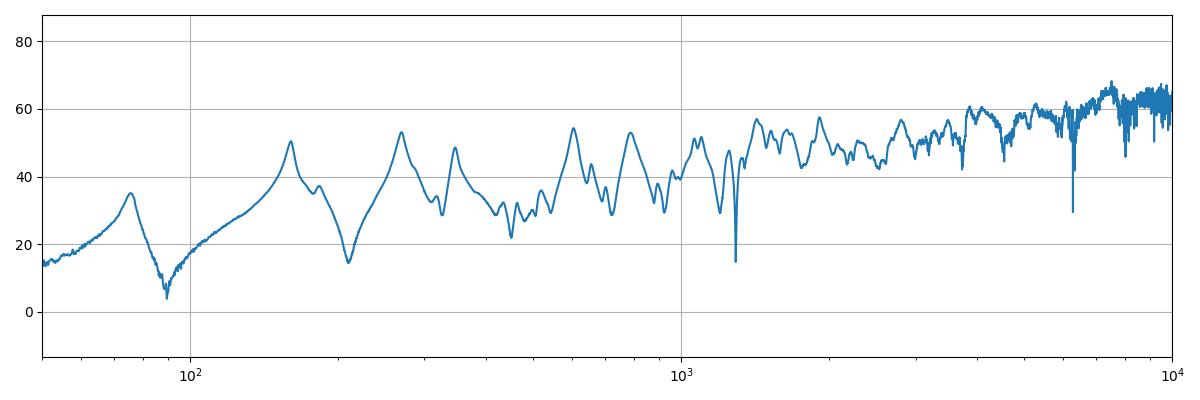

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.semilogx(mat['freq'].reshape(-1),20*np.log10(np.abs(mat['FRF'].reshape(-1))),label="")
ax1.grid()
#ax1.legend()
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title(r"")
ax1.set_xlim(50, 10000)
ax1.set_ylim()

fig.tight_layout()

# plt.show()

# Expérience sur table d'harmonie uniquement

In [20]:
for i, file in enumerate(os.listdir(path_to_folder)) :
    filename, file_extension = os.path.splitext(file)
    if file_extension == ".mat" :
        print(file)

Guitare_Da_Prova_Pos_1.mat
Guitare_Da_Prova_Pos_2.mat
Guitare_Da_Prova_Decouple_Pos_1.mat
Guitare_Da_Prova_Pos_1_Doigt.mat
Guitare_Da_Prova_Decouple_Pos_2.mat


In [21]:
table_exp_pos1 = {
    "x_acc" : 13e-2, #position selon x de l'accéléromètre (m)
    "y_acc" : 8e-2, #position selon y de l'accéléromètre (m)
}

table_exp_pos2 = {
    "x_acc" : 19e-2, #position selon x de l'accéléromètre (m)
    "y_acc" : 11e-2, #position selon y de l'accéléromètre (m)
}

table_exp = {
    "table_config" : table_composite,
    "fs" : 0, #fréquence d'échantillonnage (Hz)
    "Pos 1" : table_exp_pos1,
    "Pos 2" : table_exp_pos2,
    "sensi_accel" : 5.39*9.81, #mV/(m/s2) : sensibilité de l'accéléromètre utilisé
    "sensi_marteau" : 19.23, #
}

In [24]:
mat = loadmat(path_to_folder+"Guitare_Da_Prova_Decouple_Pos_1.mat")
print(mat.keys())

fs = mat["fs"].reshape(-1)
table_exp["fs"] = fs

table_exp_pos1["acc_t"] = mat["acc_t"].reshape(-1)
table_exp_pos1["time"] = mat["time"].reshape(-1)
table_exp_pos1["frf"] = mat["FRF"].reshape(-1)
table_exp_pos1["freq"] = mat["freq"].reshape(-1)

mat = loadmat(path_to_folder+"Guitare_Da_Prova_Decouple_Pos_2.mat")
table_exp_pos2["acc_t"] = mat["acc_t"].reshape(-1)
table_exp_pos2["time"] = mat["time"].reshape(-1)
table_exp_pos2["frf"] = mat["FRF"].reshape(-1)
table_exp_pos2["freq"] = mat["freq"].reshape(-1)

dict_keys(['__header__', '__version__', '__globals__', 'FRF', 'acc_t', 'fen_acc', 'fen_mar', 'freq', 'fs', 'mar_t', 'signal_accelero_fen', 'signal_marteau_fen', 'time'])


In [ ]:
mm.ESPRIT()

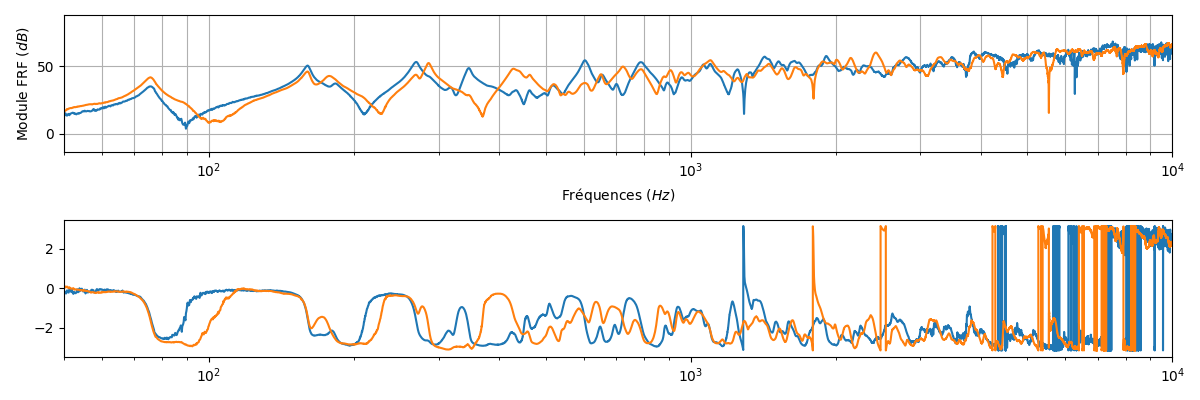

In [42]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.semilogx(table_exp_pos1["freq"],20*np.log10(np.abs(table_exp_pos1["frf"])),label="pos 1")
ax1.semilogx(table_exp_pos2["freq"],20*np.log10(np.abs(table_exp_pos2["frf"])),label="pos 2")
ax1.grid(which="both")
ax1.set_title(r"")
ax1.set_ylabel("Module FRF $(dB)$")
ax1.set_xlabel("Fréquences $(Hz)$")
# ax1.legend()
ax1.set_xlim(50,10000)
ax1.set_ylim()

ax2.semilogx(table_exp_pos1["freq"],np.angle(table_exp_pos1["frf"]),label="pos 1")
ax2.semilogx(table_exp_pos2["freq"],np.angle(table_exp_pos2["frf"]),label="pos 2")
ax2.set_xlim(50,10000)

fig.tight_layout()

plt.show()